In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-campaign-performance-dataset/ad_campaign_performance.csv


# <p style="background-color: #00b4d8; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">AD Compaign Performance Analysis and Prediction</p>

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">
    
### **Overview**  
- This project focuses on optimizing advertising campaigns by analyzing synthetic campaign data.  
- The dataset includes details such as budget, duration, platform, content type, target demographics, and region.  
- Key performance metrics include **Click-Through Rate (CTR), Cost Per Click (CPC), and Conversion Rate**.  
- A **Success** label indicates whether a campaign met predefined CTR and Conversion Rate thresholds.  
- The goal is to extract insights and develop predictive models to enhance campaign efficiency.  

### **Objectives**  
- **Minimize budget** while maintaining or improving campaign performance.  
- **Increase conversion rate** by identifying key factors influencing success.  
- **Optimize ad spend allocation** through data-driven insights.  
- **Leverage predictive modeling** to forecast campaign success and maximize return on investment (ROI).

# <b><span style='color:#03045e'> Importing Necessary Libraries</span></b>

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# <b><span style='color:#03045e'> Checking Versions of libraries</span></b>

In [3]:
print("pandas:",pd.__version__)
print("numpy:",np.__version__)
print("seaborn:",sns.__version__)
print("matplotlib:",matplotlib.__version__)

pandas: 2.2.2
numpy: 1.26.4
seaborn: 0.12.2
matplotlib: 3.7.5


# <b><span style='color:#03045e'> Importing the dataset</span></b>

In [4]:
df = pd.read_csv("/kaggle/input/advertising-campaign-performance-dataset/ad_campaign_performance.csv")

# <b><span style='color:#03045e'> Style  </span></b>

In [5]:
colors = ["#03045e", "#0077b6", "#00b4d8", "#90e0ef", "#64dfdf"]
sns.set(rc={'axes.facecolor': '#caf0f8'}, style='darkgrid')

# <b><span style='color:#03045e'> Exploring Ad dataset </span></b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

### Insights from Ad data info:

- No Missing values 
- 6 Categorical columns and 8 Numerical columns
- There are 1000 records

In [7]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">
    
### Dataset Columns Overview

 - **Campaign_ID** – Unique alphanumeric identifier for each campaign

 - **Budget** – Allocated budget for the campaign (in USD)

 - **Duration** – Number of days the campaign runs

 - **Platform** – The platform where the ad is run (Facebook, Instagram, Google, YouTube, LinkedIn)

 - **Content_Type** – Type of ad content (Image, Video, Carousel, Story, Text)

 - **Target_Age** – Age group targeted (18-24, 25-34, 35-44, 45-54, 55+)

 - **Target_Gender** – Gender targeted (Male, Female, All)

 - **Region** – Geographical region targeted (US, UK, India, Canada, Germany)

 - **Clicks** – Number of times users clicked on the ad

 - **Conversions** – Number of successful conversions

 - **CTR (Click-Through Rate)** – (Clicks / Budget) * 100

 - **CPC (Cost Per Click**) – (Budget / Clicks)

 - **Conversion_Rate** – (Conversions / Clicks) * 100

 - **Success** – Binary label (1 = successful campaign, 0 = unsuccessful campaign)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Budget,1000.0,24592.139000,14632.696566,109.000000,11480.000000,23965.000000,37953.750000,49950.000000
Duration,1000.0,31.692000,16.542999,3.000000,17.000000,32.000000,46.000000,60.000000
Clicks,1000.0,25130.927000,14205.447930,98.000000,13225.250000,25013.500000,37386.500000,49820.000000
Conversions,1000.0,2480.360000,1449.470849,13.000000,1222.750000,2407.000000,3771.250000,4995.000000
CTR,1000.0,388.988301,1544.579703,0.232358,52.635433,102.213286,213.586455,31711.612903
CPC,1000.0,2.968978,15.660721,0.003153,0.468196,0.978351,1.899861,430.370690
Conversion_Rate,1000.0,26.856985,88.893199,0.036164,4.889723,9.847713,18.757727,1554.121864
Success,1000.0,0.897000,0.304111,0.000000,1.000000,1.000000,1.000000,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

## Key insights from this data summary
**Budget Distribution**
 - The Average budget is **24592**.with a standand deviation of 14632.
 - The minimum budget is **109** and the maximum is **49950**. showing a wide range of spending.
 - The median is **23965** is close to mean, indicates fairly symmentric.

**Campaign Duration**
 - The campaigns typically runs for around **32 days on average** . with a range of (3 - 60 days)
   
**Clicks & Conversions**
 - The average clicks from campaigns is **25130**. the average conversions is **2480**. which is approx **10% of clicks are became Conversions**.

**CPC (Cost Per Click)**
 - The average CPC is **2.97**, but the maximum CPC is **₹430.37** , suggesting a few campaigns have extremely high per-click costs.
 - The 75th percentile CPC is **₹1.89**, meaning most campaigns have a cost-per-click below this, but there are **outliers**.
   
**Campaign Success Rate**
 - The success rate is very high, with a **mean of 0.897**, meaning nearly **90% of campaigns are marked as successful**.
   

In [9]:
df.describe(include="object").T

,count,unique,top,freq
Campaign_ID,1000,1000,CAMP-XAJI0Y,1
Platform,1000,5,YouTube,226
Content_Type,1000,5,Story,213
Target_Age,1000,5,35-44,217
Target_Gender,1000,3,All,346
Region,1000,5,UK,224


<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

- **No Duplicate records** : Campaign_ID are  unique

<div style="border-radius:10px; padding: 15px; background-color: #f0e0ef; font-size:200%; text-align: justify;">
    
## Exploratory data Analysis** 
</div>

# <b><span style='color:#03045e'> Campaign Platform Distribution </span></b>

In [10]:

platform_val_count = df["Platform"].value_counts().reset_index()
platform_val_count.columns = ["Platform","values"]
fig = px.pie(platform_val_count,
             names = "Platform",
             values = "values",
             title = "Campaign Platform Distribution",
             color_discrete_sequence = colors
            ) 
fig.show()

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">
    
**Campaigns are equally distributed across platforms.**

# <b><span style='color:#03045e'> Campaign distribution across Ages </span></b>

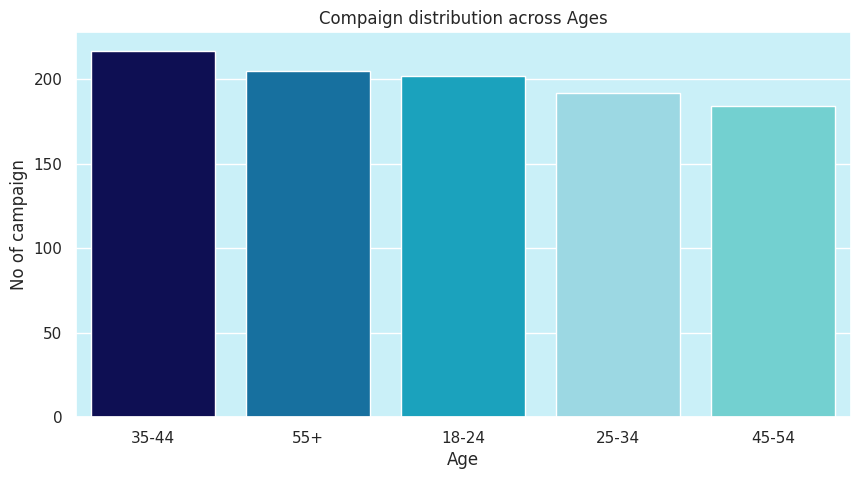

In [11]:
Age_campaign=df["Target_Age"].value_counts().reset_index()
Age_campaign.columns = ["Age","count"]
plt.figure(figsize=(10,5))
sns.barplot(data=Age_campaign,x="Age",y="count",palette = colors)
plt.xlabel("Age")
plt.ylabel("No of campaign")
plt.title("Compaign distribution across Ages")
plt.show()


# <b><span style='color:#03045e'> Campaign Distribution across Gender</span></b>

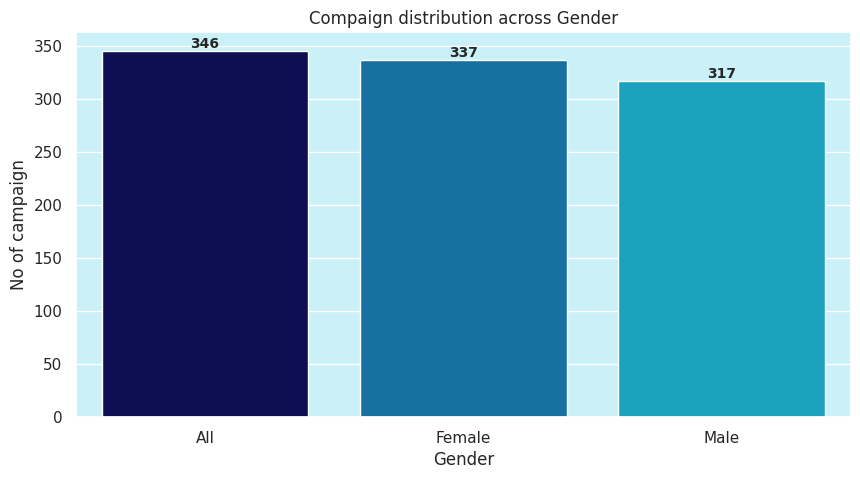

In [12]:
Gender_campaign=df["Target_Gender"].value_counts().reset_index()
Gender_campaign.columns = ["Gender","count"]
plt.figure(figsize=(10,5))
ax = sns.barplot(data=Gender_campaign,x="Gender",y="count",palette = colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Gender")
plt.ylabel("No of campaign")
plt.title("Compaign distribution across Gender")
plt.show()


# <b><span style='color:#03045e'> Campaign Region Distribution </span></b>

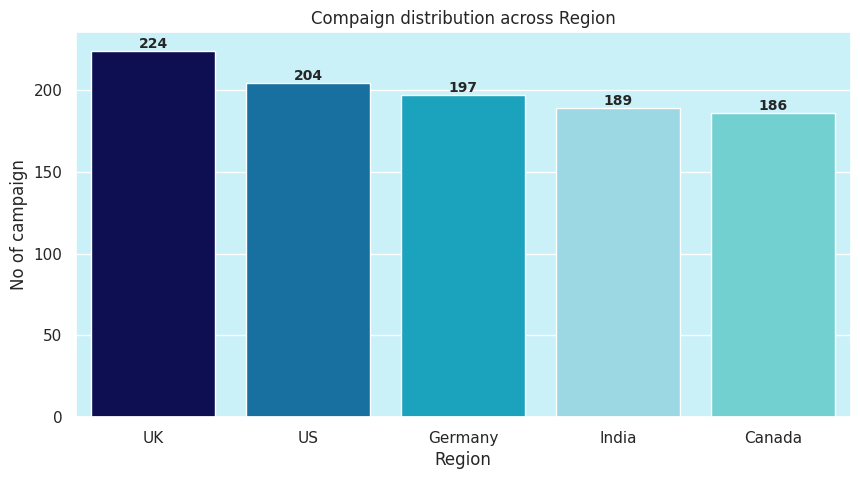

In [13]:
region_campaign=df["Region"].value_counts().reset_index()
region_campaign.columns = ["Region","count"]
plt.figure(figsize=(10,5))
ax = sns.barplot(data= region_campaign,x="Region",y="count",palette = colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Region")
plt.ylabel("No of campaign")
plt.title("Compaign distribution across Region")
plt.show()


# <b><span style='color:#03045e'> Total Budget Allocation Across Category </span></b>

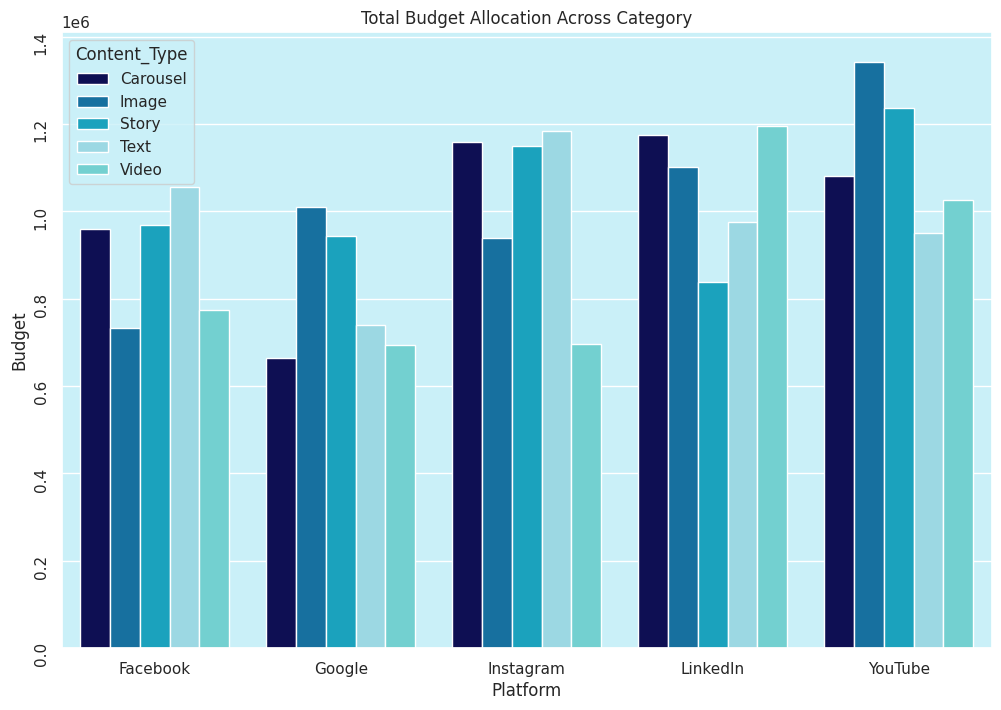

In [14]:
category_budget = df.groupby(["Platform","Content_Type"])["Budget"].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="Platform", y="Budget",hue="Content_Type",data=category_budget,palette=colors)
plt.xlabel("Platform")
plt.ylabel("Budget")
plt.title("Total Budget Allocation Across Category")
plt.yticks(rotation= 90)
plt.show()

# <b><span style='color:#03045e'> Total Budget Allocation Across Category </span></b>

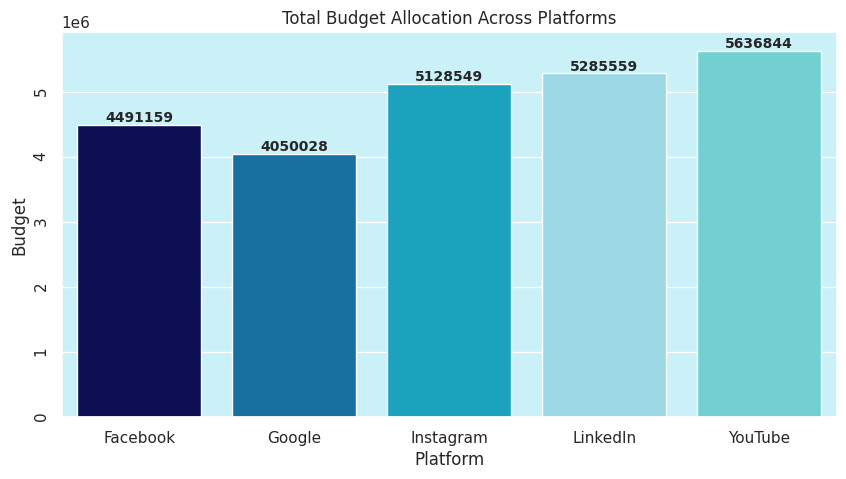

In [15]:
platform_budget = df.groupby("Platform")["Budget"].sum().reset_index()
platform_budget.columns = ["Platform","Budget"]
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Platform", y="Budget",data=platform_budget,palette=colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.xlabel("Platform")
plt.ylabel("Budget")
plt.title("Total Budget Allocation Across Platforms")
plt.yticks(rotation= 90)
plt.show()



<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">
    
 ## Campaign Budget Distribution  

The campaign budget is distributed across multiple platforms.  

- **Facebook campaign spending:** 44M 
- **Google campaign spending:** 40M   
- **Instagram campaign spending:** 51M   
- **LinkedIn campaign spending:** 52M   
- **YouTube campaign spending:** 56M   


# <b><span style='color:#03045e'> Total Budget Allocation Across Category </span></b>

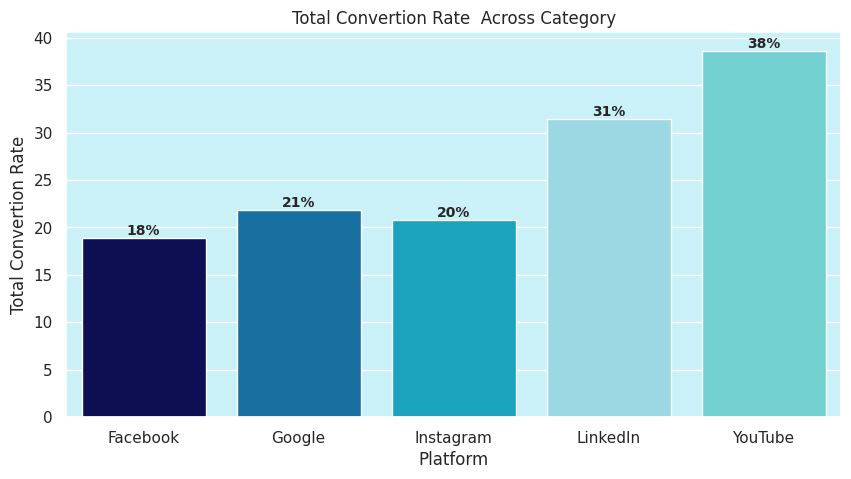

In [16]:
category_conversion = df.groupby("Platform")["Conversion_Rate"].sum().reset_index()
category_conversion.columns = ["Platform", "sum_conversion_rate"]
category_conversion = category_conversion.merge(platform_val_count, how="left", on="Platform")
category_conversion["Total_CR"] = category_conversion["sum_conversion_rate"] / category_conversion["values"]

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Platform", y="Total_CR",data=category_conversion,palette=colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.xlabel("Platform")
plt.ylabel("Total Convertion Rate")
plt.title("Total Convertion Rate  Across Category")
plt.show()

# <b><span style='color:#03045e'> Total Budget Allocation Across Category </span></b>

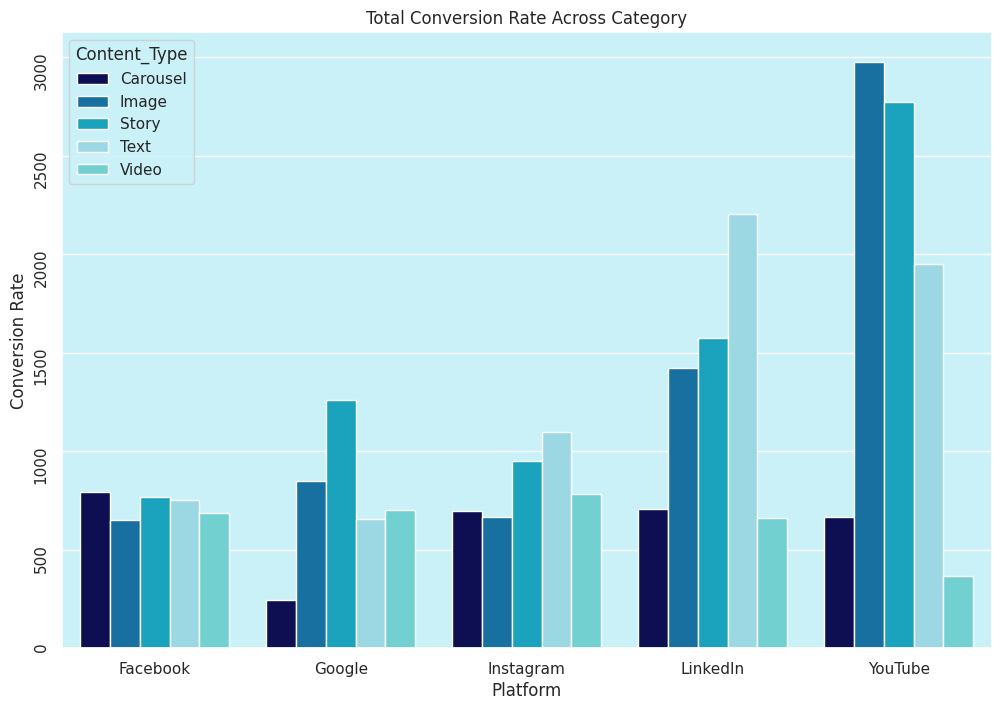

In [17]:
category_conversion_rate = df.groupby(["Platform","Content_Type"])["Conversion_Rate"].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="Platform", y="Conversion_Rate",hue="Content_Type",data=category_conversion_rate,palette=colors)
plt.xlabel("Platform")
plt.ylabel("Conversion Rate")
plt.title("Total Conversion Rate Across Category")
plt.yticks(rotation= 90)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">
    
 ## Total Convertion Rate  Across Category 

**Youtube Convertion Rate is significantly high**, followed by linkedin.


<div style="border-radius:10px; padding: 15px; background-color: #f0e0ef; font-size:200%; text-align: justify;">
    
## Feature Engineering

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

**Creating new columns to understand the budget and their Conversion**


In [18]:
# cost per conversion

df["CPC"] = df["Budget"]/df["Conversion_Rate"]

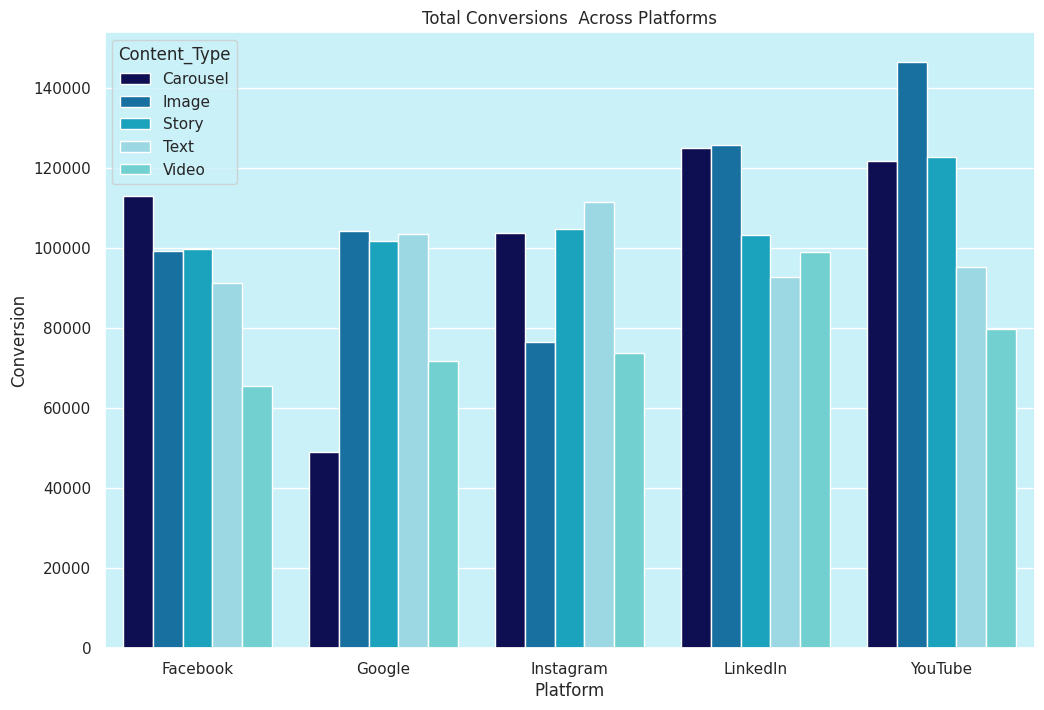

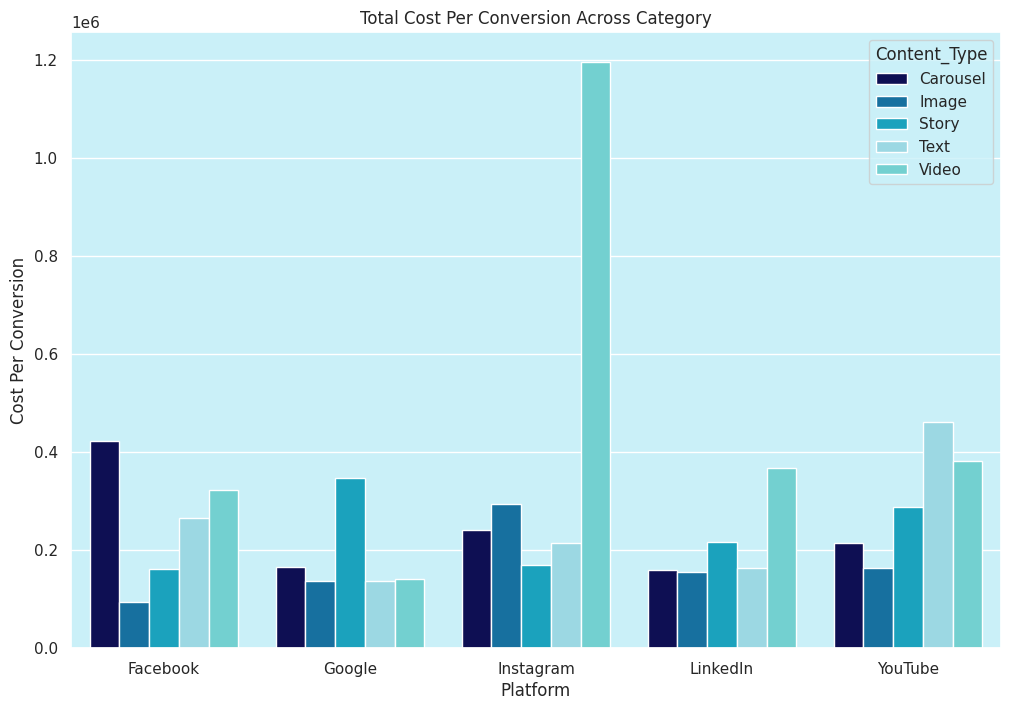

In [19]:
platform_Conversions = df.groupby(["Platform","Content_Type"])["Conversions"].sum().reset_index()
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Platform", y="Conversions",hue="Content_Type", data=platform_Conversions,palette=colors)
plt.xlabel("Platform")
plt.ylabel("Conversion")
plt.title("Total Conversions  Across Platforms")
plt.show()


category_CPC = df.groupby(["Platform","Content_Type"])["CPC"].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="Platform", y="CPC",hue="Content_Type",data=category_CPC,palette=colors)
plt.xlabel("Platform")
plt.ylabel("Cost Per Conversion")
plt.title("Total Cost Per Conversion Across Category")

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

- Instagram **Video Campaign** consumes **High budget and the conversion is low**.
- Youtube **Carousel and Image Campaign** consumes **little budget and the conversion is high**
- Followed by **LinkedIn Carousel and Image campaign more Conversion with little budget** compare with other campaigns.


  Target_Age  Conversions
0      18-24       523104
1      25-34       480797
2      35-44       536248
3      45-54       430052
4        55+       510159


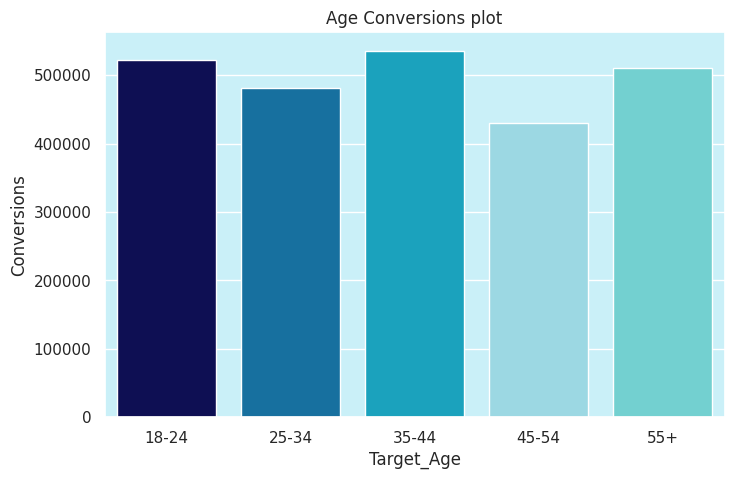

In [20]:
age_conversion = df.groupby("Target_Age")["Conversions"].sum().reset_index()
print(age_conversion)
plt.figure(figsize=(8,5))
sns.barplot(data=age_conversion,x= "Target_Age",y="Conversions",palette=colors)
plt.xlabel("Target_Age")
plt.ylabel("Conversions")
plt.title("Age Conversions plot")
plt.show()


In [21]:
Age_conversion = df.groupby(["Platform","Content_Type","Target_Age"])["CPC"].sum().reset_index()
Age_conversion

,Platform,Content_Type,Target_Age,CPC
0,Facebook,Carousel,18-24,27860.069933
1,Facebook,Carousel,25-34,25946.283543
2,Facebook,Carousel,35-44,30102.145277
3,Facebook,Carousel,45-54,307781.946794
4,Facebook,Carousel,55+,31402.181855
...,...,...,...,...
120,YouTube,Video,18-24,113002.997810
121,YouTube,Video,25-34,128990.004058
122,YouTube,Video,35-44,79188.103210
123,YouTube,Video,45-54,14396.031977


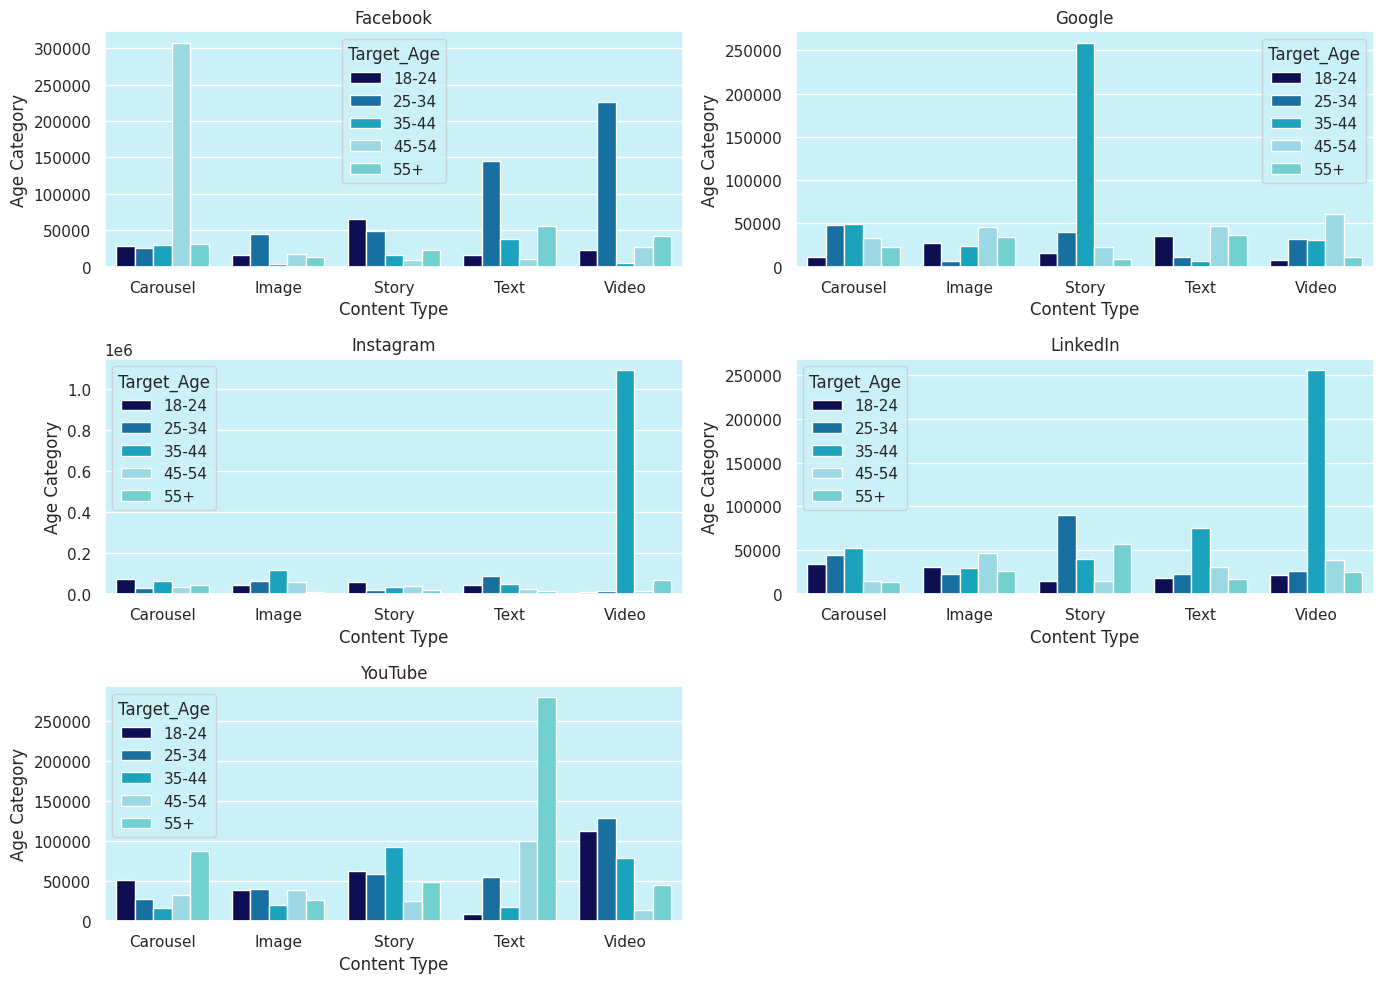

In [22]:
platforms_lst = Age_conversion["Platform"].unique()
plt.figure(figsize=(14, 10))

for i in range(len(platforms_lst)):
    temp_df = Age_conversion[Age_conversion["Platform"]==platforms_lst[i]]
    plt.subplot(3,2,i+1)
    sns.barplot(data=temp_df,x="Content_Type",y="CPC",hue="Target_Age",palette=colors)
    plt.xlabel("Content Type")
    plt.ylabel("Age Category")
    plt.title(f"{platforms_lst[i]}")
plt.tight_layout()  
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

- The conversion rates across **all age categories appear to be at similar levels**.
- The campaign budget is **higher** for the **35-44 targeted age group, focusing on Instagram and LinkedIn video campaigns**.


In [23]:
gender_cpc  = df.groupby(["Target_Gender"])["CPC"].sum().reset_index()

px.pie(
    data_frame = gender_cpc,
    names = "Target_Gender",
    values = "CPC",
    title = "Gender Cost per Conversion",
    color_discrete_sequence = colors
    
)

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

- **All Gender conversion and Cost per conversion** is better than individual Female and Male Conversions.
- **Female Conversion is low but the CPC is high**
  

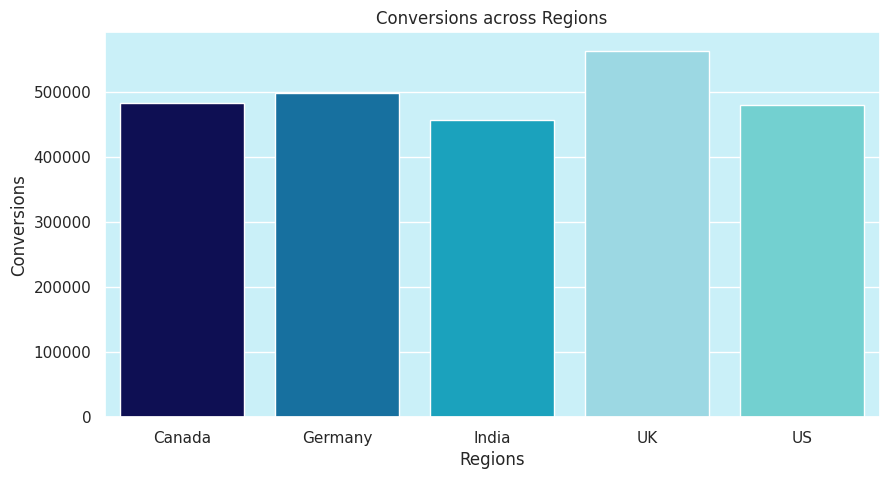

In [24]:
Region_conversions = df.groupby(["Region"])["Conversions"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=Region_conversions,x="Region",y= "Conversions",palette = colors)
plt.xlabel("Regions")
plt.ylabel("Conversions")
plt.title("Conversions across Regions")
plt.show()

In [25]:
Region_cpc  = df.groupby(["Region"])["CPC"].sum().reset_index()

px.bar(
    data_frame = Region_cpc,
    x = "Region",
    y = "CPC",
    title = "Region Cost per Conversion",
    color_discrete_sequence = colors
    
)

<div style="border-radius:10px; padding: 15px; background-color: #caf0f8; font-size:120%; text-align:left; ">

- **India**, allocated campaigns are low but **conversion an cost per conversion is pretty good**.
- Canada, Germany have good conversions and CPC

<div style="border-radius:10px; padding: 15px; background-color: #cdb4db; font-size:120%; text-align:left; ">

# **Final Findings**  

- Invest more in **YouTube and LinkedIn** campaigns since they deliver high conversions at a lower cost, and cut down spending on **Instagram Video campaigns**, which are not performing well.  

- Campaigns that include **all genders** perform better than those targeting males or females separately. Using a broader approach can help improve conversions.  

- Some campaigns have **very high CPC**, which affects overall cost efficiency. Adjusting bids and optimizing these campaigns can keep costs closer to the average and improve ROI.  

- Campaigns in **India, Canada, and Germany** are already doing well. Continuing to invest in these regions while experimenting with small budget shifts can further enhance performance.  

- ince most campaigns already have a **high success rate (90%)**, the focus should be on making them more cost-effective. Testing shorter, high-impact campaigns can help maintain performance while reducing unnecessary spending.  

<div style="border-radius:10px; padding: 15px; background-color: #f0e0ef; font-size:200%; text-align: justify;">
    
**Please share any opinions or corrections on this analysis in the comment...🖋️** 

**UPVOTE'✨**